+ 数据训练损失的直观对比
+ 优化模型 预测结果控制--下图有数据对比图

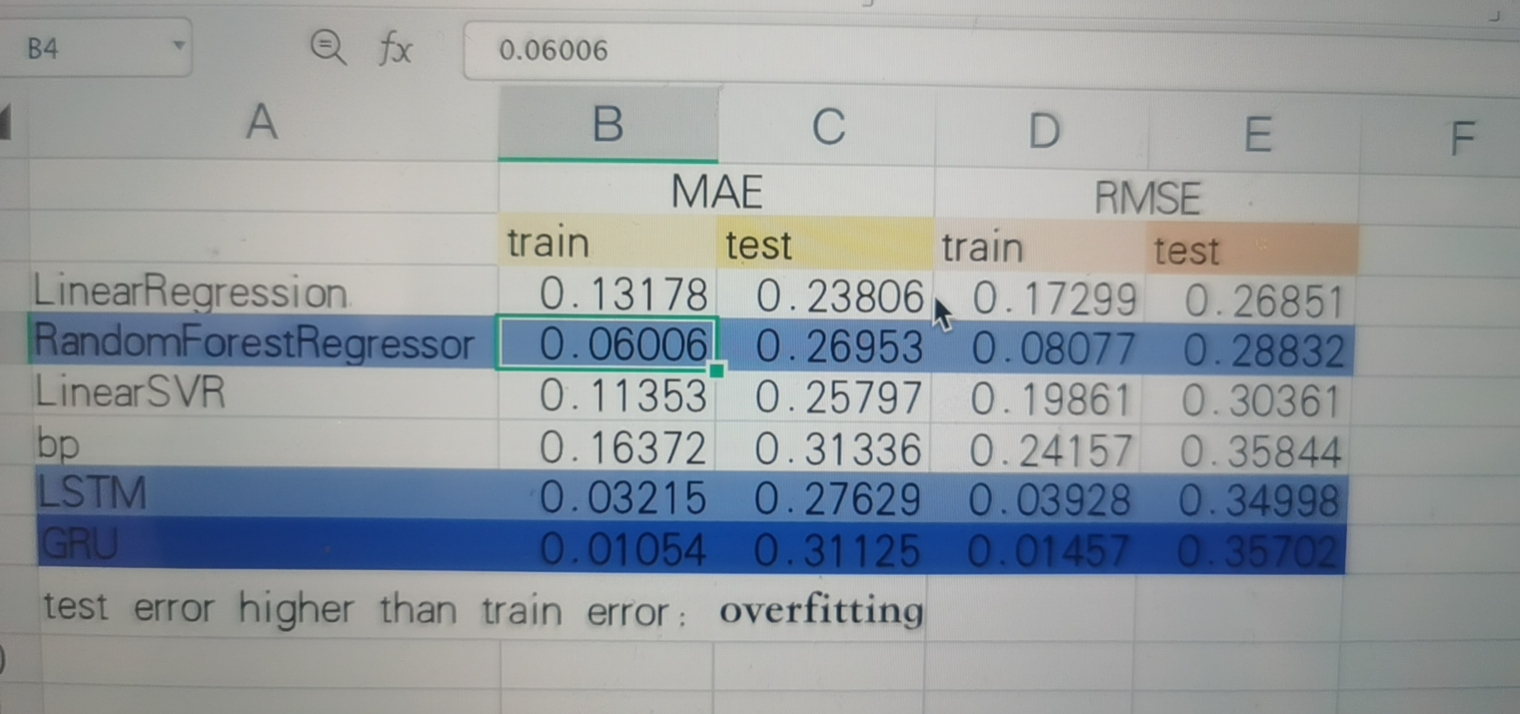

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df1=pd.read_csv(r're2.csv') 
# df1=df1.iloc[:,:]
#df1=df1.iloc[:,1:49]
df1.tail()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
196,236.514999,234.388890,153.476112,110.555555,159.433889,85.717221,130.836666,157.151665,55.256111,159.283332,...,134.591111,156.002777,77.674444,173.172778,344.444444,667.933335,737.990555,710.002778,693.589446,737.291666
197,713.045001,651.401110,542.612777,155.409444,70.130556,160.881113,139.559445,68.682223,158.122222,128.194998,...,152.055556,161.061110,135.171112,156.267778,106.561668,241.715001,220.311112,153.117778,242.218887,226.202223
198,151.117777,244.520557,196.023334,78.462777,165.884445,115.605000,109.949445,159.746666,173.015557,165.723333,...,151.533334,151.815554,78.263888,164.062222,226.730000,209.951110,263.909999,238.962222,238.823334,225.627221
199,150.513333,244.559443,192.397777,83.754444,165.795001,125.275557,96.351665,163.762221,122.296110,128.744446,...,117.146111,169.991667,249.088333,114.208334,192.322222,238.506110,135.641111,263.253334,239.797223,145.748333
200,232.466111,242.908889,131.151111,145.407222,164.165557,71.787777,155.284444,163.395555,64.116112,186.358334,...,96.638890,160.934444,201.298887,115.521111,306.492223,749.923332,706.578889,683.246668,756.194443,747.739446


Text(0.5, 1.0, 'by days')

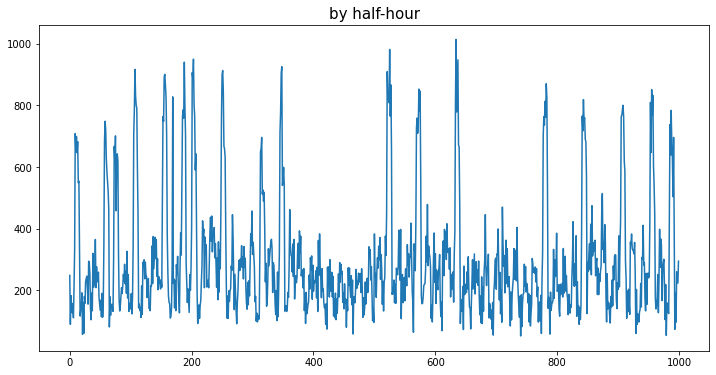

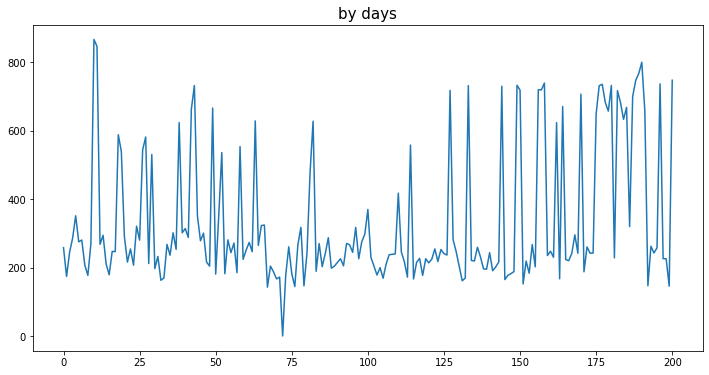

In [3]:
draw1=df1.values.reshape(1,-1)
draw1=draw1[0,:]
plt.figure(figsize=(12,6))
plt.plot(draw1[0:1000])#plt.plot(draw1[0:1000])
plt.title("by half-hour",fontsize='15') 

draw2=df1['48']
plt.figure(figsize=(12,6))
plt.plot(draw2)
plt.title("by days",fontsize='15') 

In [4]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
X=df.iloc[:-1,:]
y=df.iloc[1:,-1]  
#print(df1)
#print(df0)
#print(df)
#print(X)
#print(y)
print(df.shape)
print(X.shape)
print(y.shape)

(201, 48)
(200, 48)
(200,)


In [5]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['target'])
x=X
input_size=len(x.iloc[1,:])#48
cut=len(y)//10#除以10取整数得20的份数
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
x.iloc[:-cut]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)
print(input_size)

8640
960
180
20
48


In [6]:
# 建立随机森林模型 预测
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(X_train, y_train) 

/tmp/ipykernel_33143/1662622921.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rf.fit(X_train, y_train)


Text(0.5, 1.0, 'Train Data')

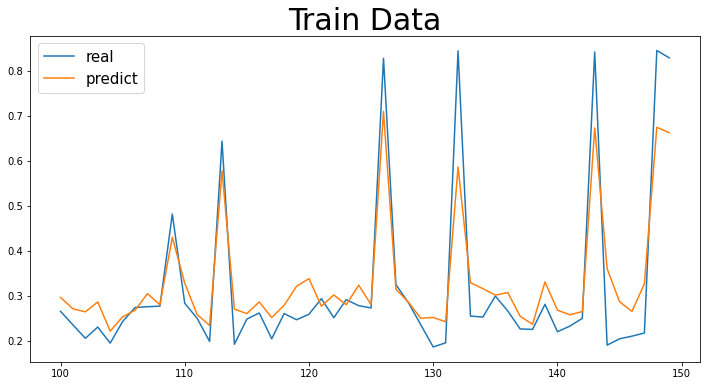

In [7]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
#展示在训练集上的表现 
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题

Text(0.5, 1.0, 'Test Data')

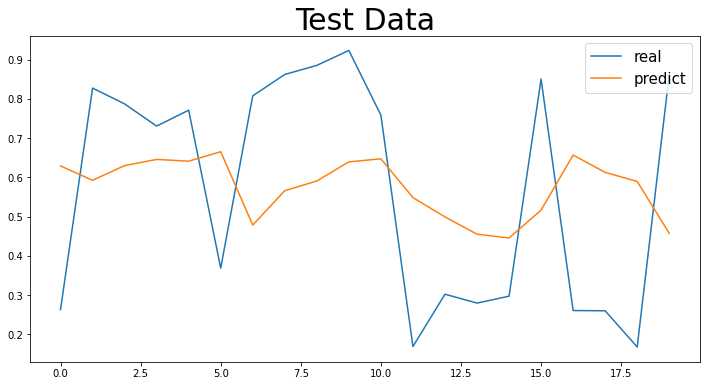

In [8]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
#展示在测试集上的表现 
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train,y_train_predict))
print(mean_squared_error(y_train,y_train_predict,squared=False) )
print(mean_absolute_percentage_error(y_train,y_train_predict))
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test,y_test_predict))
print(mean_squared_error(y_test,y_test_predict,squared=False) )
print(mean_absolute_percentage_error(y_test,y_test_predict) )

训练集上的MAE/MSE/MAPE
0.06117546254450313
0.08162585363261901
3037337492512.9023
测试集上的MAE/MSE/MAPE
0.26957633297538575
0.28898098328608574
0.7377471781286249


In [10]:
#设置LSTM、GRU的时间窗
window=5
#处理LSTM数据
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.values #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度5+1
result = []
for index in range(len(data) - sequence_length):#循环170-5次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到161个样本，样本形式为6天*3特征
row = round(0.9 * result.shape[0])#划分训练集测试集
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]
#reshape成 5天*3特征
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [11]:
#建立LSTM模型 训练
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
#建立、训练模型过程
d = 0.01
model = Sequential()#建立层次模型
model.add(LSTM(32, input_shape=(window, input_size), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(LSTM(16, input_shape=(window, input_size), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(2,activation='relu'))   #建立全连接层     
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()
#训练模型epochs次
model.fit(X_train, y_train, epochs =1000, batch_size = 256) 

2022-09-30 12:13:24.550726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 12:13:24.727038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-30 12:13:24.727067: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-30 12:13:24.760882: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-30 12:13:25.564439: W tensorflow/stream_executor/pla

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             10368     
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13,541
Trainable params: 13,541
Non-traina

1/1 [==============================] - 0s 23ms/step - loss: 0.0382 - accuracy: 0.0057
Epoch 152/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0378 - accuracy: 0.0057
Epoch 153/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0379 - accuracy: 0.0057
Epoch 154/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0373 - accuracy: 0.0057
Epoch 155/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0377 - accuracy: 0.0057
Epoch 156/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0371 - accuracy: 0.0057
Epoch 157/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0372 - accuracy: 0.0057
Epoch 158/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0376 - accuracy: 0.0057
Epoch 159/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0375 - accuracy: 0.0057
Epoch 160/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0377 - accuracy: 0.0057
Epoch

1/1 [==============================] - 0s 21ms/step - loss: 0.0130 - accuracy: 0.0114
Epoch 314/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0125 - accuracy: 0.0114
Epoch 315/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0130 - accuracy: 0.0114
Epoch 316/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0125 - accuracy: 0.0114
Epoch 317/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0128 - accuracy: 0.0114
Epoch 318/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0120 - accuracy: 0.0114
Epoch 319/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0123 - accuracy: 0.0114
Epoch 320/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0125 - accuracy: 0.0114
Epoch 321/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0121 - accuracy: 0.0114
Epoch 322/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0125 - accuracy: 0.0114
Epoch

1/1 [==============================] - 0s 18ms/step - loss: 0.0042 - accuracy: 0.0114
Epoch 476/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0041 - accuracy: 0.0114
Epoch 477/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0044 - accuracy: 0.0114
Epoch 478/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0046 - accuracy: 0.0114
Epoch 479/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0039 - accuracy: 0.0114
Epoch 480/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0045 - accuracy: 0.0114
Epoch 481/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0044 - accuracy: 0.0114
Epoch 482/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0041 - accuracy: 0.0114
Epoch 483/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0043 - accuracy: 0.0114
Epoch 484/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0039 - accuracy: 0.0114
Epoch

1/1 [==============================] - 0s 21ms/step - loss: 0.0019 - accuracy: 0.0114
Epoch 638/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 0.0114
Epoch 639/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 0.0114
Epoch 640/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 0.0114
Epoch 641/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 0.0114
Epoch 642/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0019 - accuracy: 0.0114
Epoch 643/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 0.0114
Epoch 644/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0018 - accuracy: 0.0114
Epoch 645/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 0.0114
Epoch 646/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.0114
Epoch

1/1 [==============================] - 0s 25ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 800/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.0114
Epoch 801/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 0.0114
Epoch 802/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 803/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.0114
Epoch 804/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 0.0114
Epoch 805/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 0.0114
Epoch 806/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 807/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 0.0114
Epoch 808/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.0114
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 0.0114
Epoch 961/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 962/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 963/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0010 - accuracy: 0.0114
Epoch 964/1000
1/1 [==============================] - 0s 20ms/step - loss: 8.8973e-04 - accuracy: 0.0114
Epoch 965/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 0.0114
Epoch 966/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0010 - accuracy: 0.0114
Epoch 967/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 0.0114
Epoch 968/1000
1/1 [==============================] - 0s 19ms/step - loss: 9.5662e-04 - accuracy: 0.0114
Epoch 969/1000
1/1 [==============================] - 0s 19ms/step - loss: 9.4628e-04 - accuracy: 

6/6 [==============================] - 1s 6ms/step


Text(0.5, 1.0, 'Train Data')

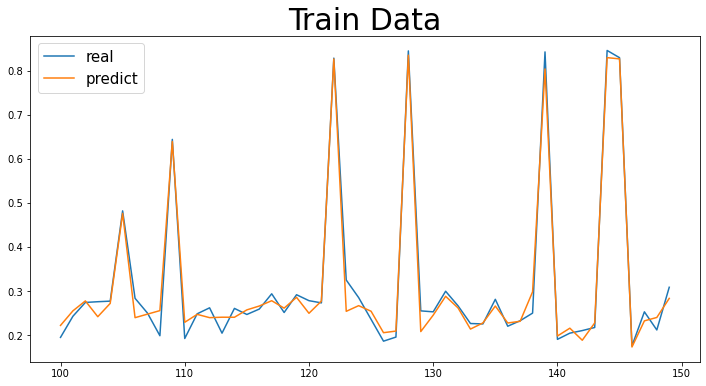

In [12]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

1/1 [==============================] - 0s 26ms/step


Text(0.5, 1.0, 'Test Data')

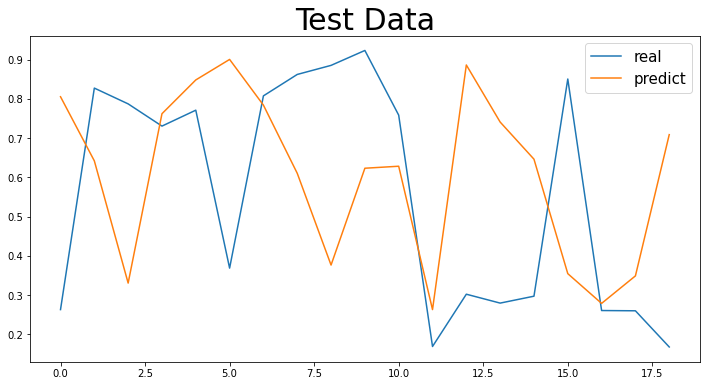

In [13]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [14]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train,y_train_predict))
print(mean_squared_error(y_train,y_train_predict,squared=False) )
print(mean_absolute_percentage_error(y_train,y_train_predict))
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test,y_test_predict))
print(mean_squared_error(y_test,y_test_predict,squared=False) )
print(mean_absolute_percentage_error(y_test,y_test_predict) )

训练集上的MAE/MSE/MAPE
0.017516187935047712
0.024398943511708487
2946933433064.789
测试集上的MAE/MSE/MAPE
0.2983192173660144
0.36163785063095744
0.8080687479742437


In [15]:
#建立GRU模型 训练
from tensorflow.keras.layers import GRU
#建立、训练模型过程
d = 0.01
model = Sequential()#建立层次模型
model.add(GRU(64, input_shape=(window, input_size), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(GRU(16, input_shape=(window, input_size), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(4,activation='relu'))   #建立全连接层     
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs =1000, batch_size = 256) #训练模型nb_epoch次

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.1757 - accuracy: 0.0057
Epoch 2/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.1744 - accuracy: 0.0057
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1680 - accuracy: 0.0057
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1532 - accuracy: 0.0057
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1401 - accuracy: 0.0057
Epoch 6/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1276 - accuracy: 0.0057
Epoch 7/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1170 - accuracy: 0.0057
Epoch 8/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1060 - accuracy: 0.0057
Epoch 9/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0954 - accuracy: 0.0057
Epoch 10/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0867 - accuracy: 0.0057
Epoch 11/10

1/1 [==============================] - 0s 28ms/step - loss: 0.0409 - accuracy: 0.0057
Epoch 84/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0427 - accuracy: 0.0057
Epoch 85/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0414 - accuracy: 0.0057
Epoch 86/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0413 - accuracy: 0.0057
Epoch 87/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0410 - accuracy: 0.0057
Epoch 88/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0420 - accuracy: 0.0057
Epoch 89/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0411 - accuracy: 0.0057
Epoch 90/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0411 - accuracy: 0.0057
Epoch 91/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0407 - accuracy: 0.0057
Epoch 92/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0414 - accuracy: 0.0057
Epoch 93/1000


1/1 [==============================] - 0s 25ms/step - loss: 0.0134 - accuracy: 0.0114
Epoch 246/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0143 - accuracy: 0.0114
Epoch 247/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0130 - accuracy: 0.0114
Epoch 248/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0130 - accuracy: 0.0114
Epoch 249/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0132 - accuracy: 0.0114
Epoch 250/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0127 - accuracy: 0.0114
Epoch 251/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0118 - accuracy: 0.0114
Epoch 252/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0129 - accuracy: 0.0114
Epoch 253/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0126 - accuracy: 0.0114
Epoch 254/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0120 - accuracy: 0.0114
Epoch

1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 0.0114
Epoch 408/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0024 - accuracy: 0.0114
Epoch 409/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 0.0114
Epoch 410/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 0.0114
Epoch 411/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 0.0114
Epoch 412/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - accuracy: 0.0114
Epoch 413/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0021 - accuracy: 0.0114
Epoch 414/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 0.0114
Epoch 415/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 0.0114
Epoch 416/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 0.0114
Epoch

1/1 [==============================] - 0s 36ms/step - loss: 0.0021 - accuracy: 0.0114
Epoch 570/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 0.0114
Epoch 571/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0017 - accuracy: 0.0114
Epoch 572/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0015 - accuracy: 0.0114
Epoch 573/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.0114
Epoch 574/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0014 - accuracy: 0.0114
Epoch 575/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 0.0114
Epoch 576/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 0.0114
Epoch 577/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0015 - accuracy: 0.0114
Epoch 578/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 0.0114
Epoch

1/1 [==============================] - 0s 27ms/step - loss: 9.1588e-04 - accuracy: 0.0114
Epoch 732/1000
1/1 [==============================] - 0s 25ms/step - loss: 9.6188e-04 - accuracy: 0.0114
Epoch 733/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 734/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.0114
Epoch 735/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0014 - accuracy: 0.0114
Epoch 736/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 737/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.0114
Epoch 738/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 0.0114
Epoch 739/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 0.0114
Epoch 740/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0016 - accuracy: 0.01

1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - accuracy: 0.0114
Epoch 891/1000
1/1 [==============================] - 0s 23ms/step - loss: 8.5046e-04 - accuracy: 0.0114
Epoch 892/1000
1/1 [==============================] - 0s 25ms/step - loss: 8.7901e-04 - accuracy: 0.0114
Epoch 893/1000
1/1 [==============================] - 0s 25ms/step - loss: 9.1346e-04 - accuracy: 0.0114
Epoch 894/1000
1/1 [==============================] - 0s 25ms/step - loss: 9.5445e-04 - accuracy: 0.0114
Epoch 895/1000
1/1 [==============================] - 0s 25ms/step - loss: 8.3882e-04 - accuracy: 0.0114
Epoch 896/1000
1/1 [==============================] - 0s 25ms/step - loss: 8.6456e-04 - accuracy: 0.0114
Epoch 897/1000
1/1 [==============================] - 0s 26ms/step - loss: 8.3689e-04 - accuracy: 0.0114
Epoch 898/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 0.0114
Epoch 899/1000
1/1 [==============================] - 0s 25ms/step - loss: 7.9

6/6 [==============================] - 1s 6ms/step


Text(0.5, 1.0, 'Train Data')

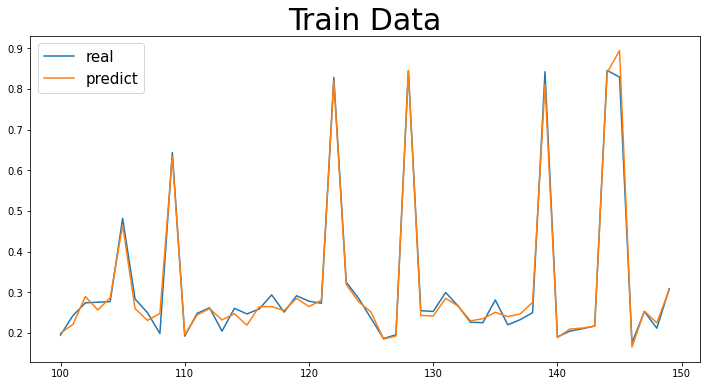

In [16]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

1/1 [==============================] - 0s 24ms/step


Text(0.5, 1.0, 'Test Data')

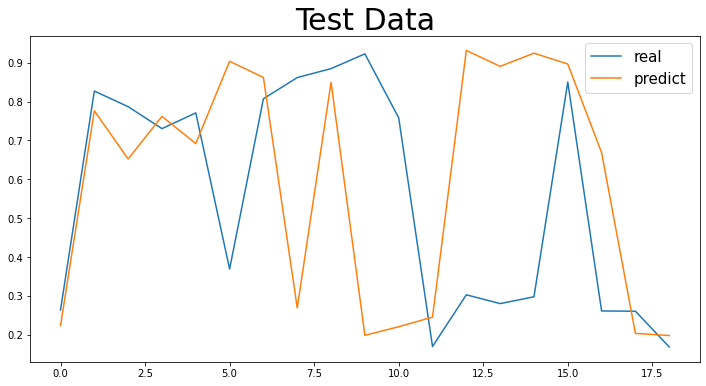

In [17]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [18]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train,y_train_predict))
print(mean_squared_error(y_train,y_train_predict,squared=False) )
print(mean_absolute_percentage_error(y_train,y_train_predict))
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test,y_test_predict))
print(mean_squared_error(y_test,y_test_predict,squared=False) )
print(mean_absolute_percentage_error(y_test,y_test_predict) )


训练集上的MAE/MSE/MAPE
0.012872951210254129
0.018013746614712747
1160786024261.8604
测试集上的MAE/MSE/MAPE
0.2790908428662371
0.3858801152456219
0.6898154775773914
